## 2-canyon run with conduino, probes ANK1 and ANK2, high N, 

Probe ANK1 upstream and ANK2 downstream, profiler probe P, no dye. I reran this experiment to confirm results from exp 26mar19 because one probe was slightly knocked over after that experiment. I ran the in-situ calibration on mar 29, so I wanted to confirm.

### Specifics and notes
* 800 g salt into bucket 1
* Table profile f0=0.70, dt1=16.8s, f1=0.75, dt2=50, f2=0.78 rad/s.
* The profiler stopped working after filling the tank, because the battery died so there is only one profile, before spin up.  
* Conduino measurements at 1 hour, 1.5 hours, 2 hours, 2.5 hours.

Calibration for probes from 29 March 2019 (https://nbviewer.jupyter.org/urls/bitbucket.org/canyonsubc/multipleCanyons/raw/tip/lab/Conduino/Calibration/notebooks/ANK_P_probes_29mar19.ipynb)

### Stratification

Bucket 1 , 800 g salt

$\rho_1= 1.03162$ g cm$^{-3}$

$\rho_2= 0.99785$ g cm$^{-3}$

### Tank filling
Started: 9:30 hrs, ended: 11:05 hrs.

### Conduino measurements
Conduino measurements

|time|What for?|file|
|:--:|:-------:|:--:|
|11:10|check up before profile|checkup_11_10.mat|
|11:14|profile|profile_after_filling.mat|
|12:15|check up|checkup_12_15.mat|
|12:42|check up|checkup_12_42.mat|
|13:17|check up|checkup_13_17.mat|
|13:45|check up|checkup_13_45.mat|
|13:50|experiment|experiment.mat|


In [1]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_style('whitegrid')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
def time2dist(max_depth, time):
    '''Convert time of measurement to distance - Not correct yet because 
    profiles goes faster at the top and slower at the bottom 
    so dt to dx conversion factor is not constant '''
    depth = np.zeros(np.shape(time))
    time_norm = time-time[0]
    depth = (time_norm * max_depth) / np.max(time_norm)
    return(depth)

def densP(reading):
    ''' Calibration from 29 feb 2019 in calibration_29mar19.ipynb. Returns density fitted using a 3rd deg polynomial.
    Input - reading::array
    Output - fitP::array of size [reading]'''
    fitP = 0.997378+(0.006040*reading)+(0.001648*reading**2)+(0.000105*reading**3)
    return(fitP)

def dens_ANK1(read):
    '''Calibration from 29 March 2019 in calibration_29mar19.ipynb'''
    rho_1 = 0.997387+0.004844*read+0.000312*read**2+0.000204*read**3 
    return(rho_1)

def dens_ANK2(read):
    '''Calibration  from 29 March 2019 in calibration_29mar19.ipynb '''
    rho_2 = 0.997311+0.006653*read+0.003429*read**2+-0.000041*read**3 # March 29, after knocking off
    #rho_2 = 0.982289+0.041039*read-0.010799*read**2+0.002785*read**3 # March 21st, Ashu's calibration, values are too high
    return(rho_2)

def plot_uprofile(ax):
    ax.axvline(16.8, color='0.8', linestyle=':')
    ax.axvline(50.0, color='0.8', linestyle=':')
        
def plot_forcing(ax, file, f0, f1, f2, t0, t1):
    '''ax: axes to plot figure on
       file: experiment file to extract time
       f0: Angular velocity of the table during spin up
       f1: f at max forcing
       f2: f to avoid spin down
       t0: time to get to f1
       t1: time to get to f2'''
    mat = sio.loadmat(file, squeeze_me=True)
    time = mat['time']
    t2 = np.round(np.max(time),2) # s

    ax0.text(0.3,0.3,r'$\Delta f_1=$%1.2f rad/s, $\Delta t_1=$%1.1f s' %((f1-f0),t0), transform=ax0.transAxes)
    ax0.text(0.5,0.7,r'$\Delta f_2=$%1.2f rad/s, $\Delta t_2=$%1.1f s' %((f2-f1),(t1-t0)), transform=ax0.transAxes)

    ax0.plot([0,t0,t1,t2],[f0,f1,f2,f2], 'g-')
    ax0.set_ylabel('f table / rad s$^{-1}$')
    ax0.set_xlabel('time / s')

Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':|ANK1|
|'ch2':|ANK2|
|'ch3':|P|



### Forcing

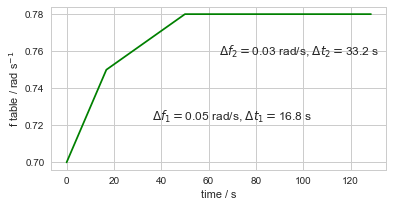

In [5]:
fig, ax0 = plt.subplots(1,1, figsize=(6,3), sharex=True)

f0 = 0.70 # initial f rad/s
f1 = 0.75 # rad/s
f2 = 0.78 # rad/s
t0 = 16.8 # s
t1 = 50.0 # s
exp_file = '../../exp_09apr19/experiment.mat'

plot_forcing(ax0, exp_file, f0, f1, f2, t0, t1)

### All readings 

Text(0.5,0,'time / s')

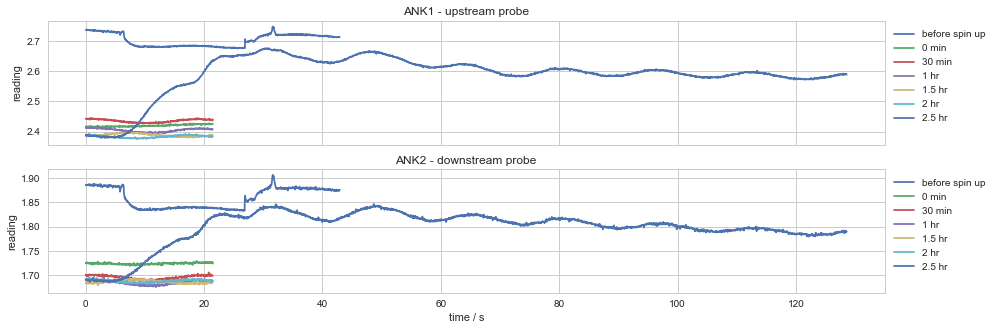

In [6]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(15,5), sharex=True)

labels = ['before spin up','0 min','30 min', '1 hr', '1.5 hr',
          '2 hr','2.5 hr','ini profile','experiment','final profile']

filepaths = ['../../exp_09apr19/profile_after_filling.mat',
             '../../exp_09apr19/checkup_11_10.mat',
             '../../exp_09apr19/checkup_12_15.mat',
             '../../exp_09apr19/checkup_12_42.mat',
             '../../exp_09apr19/checkup_13_17.mat',
             '../../exp_09apr19/checkup_13_45.mat',
             '../../exp_09apr19/experiment.mat',
             ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    
ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')

ax1.set_xlabel('time / s')

before spin up 1.016802031996765 1.0212691550103237
0 min 1.0138241118878275 1.018757549208
30 min 1.0139837232411433 1.0182492265142353
1 hr 1.0136735330977116 1.0180547713298034
1.5 hr 1.013511878732514 1.0180825266298845
2 hr 1.013466111278235 1.0181093608243503
2.5 hr 1.0155804130914745 1.0201237798069323


Text(0.5,0,'time / s')

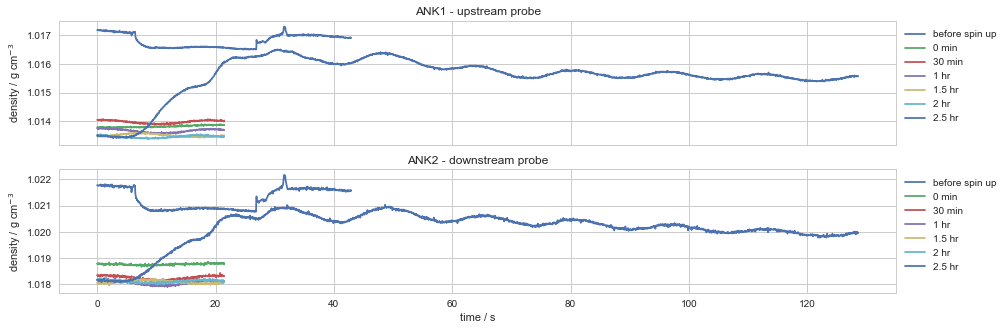

In [7]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(15,5), sharex=True)

labels = ['before spin up','0 min','30 min', '1 hr', '1.5 hr',
          '2 hr','2.5 hr','ini profile','experiment','final profile']

filepaths = ['../../exp_09apr19/profile_after_filling.mat',
             '../../exp_09apr19/checkup_11_10.mat',
             '../../exp_09apr19/checkup_12_15.mat',
             '../../exp_09apr19/checkup_12_42.mat',
             '../../exp_09apr19/checkup_13_17.mat',
             '../../exp_09apr19/checkup_13_45.mat',
             '../../exp_09apr19/experiment.mat',
             ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    time = mat['time']
    densP1 = dens_ANK1(P1)
    densP2 = dens_ANK2(P2)
    ax0.plot(time,densP1, label=lab)
    ax1.plot(time,densP2, label=lab)
    print(lab, np.mean(densP1), np.mean(densP2))
ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('density / g cm$^{-3}$')
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')

ax1.set_xlabel('time / s')

**Drift: Change in density throughout spin up**

(1.012, 1.02)

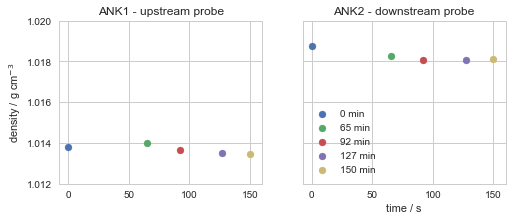

In [8]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(8,3), sharey=True)

time_checkup = [0,65,92,127,150] # min
filepaths = ['../../exp_09apr19/checkup_11_10.mat',
             '../../exp_09apr19/checkup_12_15.mat',
             '../../exp_09apr19/checkup_12_42.mat',
             '../../exp_09apr19/checkup_13_17.mat',
             '../../exp_09apr19/checkup_13_45.mat',
             ]
sns.set_palette(sns.cubehelix_palette(8))
for filepath, time_ch in zip(filepaths, time_checkup):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    densP1 = np.mean(dens_ANK1(P1))
    densP2 = np.mean(dens_ANK2(P2))
    ax0.scatter(time_ch,densP1, label='%s min' %time_ch)
    ax1.scatter(time_ch,densP2, label='%s min' %time_ch)
    
ax1.legend(loc=0)

ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')

ax1.set_xlabel('time / s')
ax0.set_ylim(1.012,1.020)

### Experiment

../../exp_09apr19/experiment.mat


Text(0.5,0,'sample')

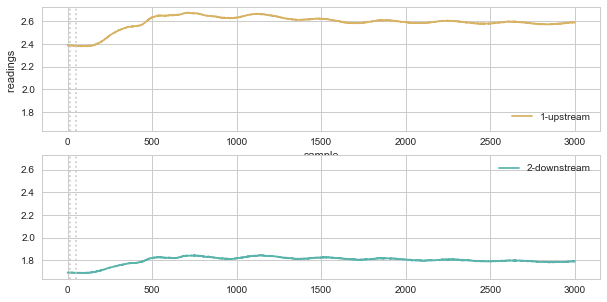

In [9]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,5), sharey=True)
labels = ['1-upstream','2-downstream']
colors = ['#d8b365','#5ab4ac']

filepath = '../../exp_09apr19/experiment.mat'
print(filepath)
    
mat = sio.loadmat(filepath, squeeze_me=True)
P1 = mat['ch1']
P2 = mat['ch2']
time = mat['time']
ax0.plot(P1,'-', label=labels[0], color=colors[0])
ax1.plot(P2,'-', label=labels[1], color=colors[1])
plot_uprofile(ax0)
plot_uprofile(ax1)
ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel('readings ')
ax0.set_xlabel('sample')

Text(0.5,1,'Probe density')

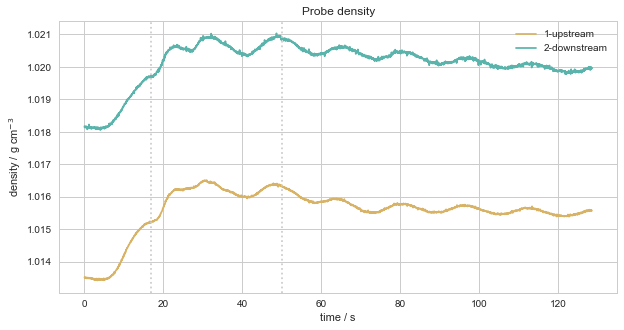

In [10]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

ax0.plot(time,dens_ANK1(P1),'-', label=labels[0], color=colors[0])
ax0.plot(time,dens_ANK2(P2),'-', label=labels[1], color=colors[1])
plot_uprofile(ax0)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density')


Text(0.5,1,'Probe density minus initial density')

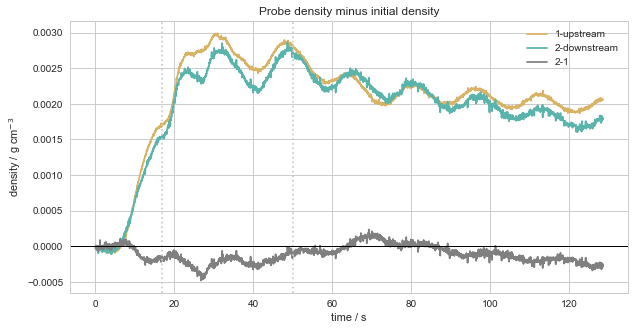

In [11]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

ax0.plot(time,dens_ANK1(P1)-dens_ANK1(P1)[0],'-', label=labels[0], color=colors[0])
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0],'-', label=labels[1], color=colors[1])
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0]-(dens_ANK1(P1)-dens_ANK1(P1)[0]),'-', label='2-1', color='0.5')
plot_uprofile(ax0)
ax0.axhline(0,color='k', linewidth=1)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density')


### Comparison between 1 and 2 canyon runs with high N

All low N runs: Upstream covered, downstream covered and two canyons

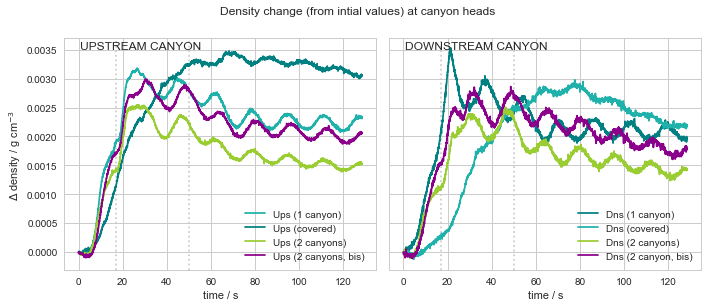

In [12]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4), sharey=True)
labels = ['1-upstream','2-downstream']

filepath_two = '../../exp_26mar19/experiment.mat'
filepath_ups = '../../exp_04apr19/experiment.mat'
filepath_dns = '../../exp_06apr19/experiment.mat'

plot_uprofile(ax0)
plot_uprofile(ax1)

mat_two = sio.loadmat(filepath_two, squeeze_me=True)
P1_two = mat_two['ch1']
P2_two = mat_two['ch2']
time_two = mat_two['time']

mat_ups = sio.loadmat(filepath_ups, squeeze_me=True)
P1_ups = mat_ups['ch1']
P2_ups = mat_ups['ch2']
time_ups = mat_ups['time']

mat_dns = sio.loadmat(filepath_dns, squeeze_me=True)
P1_dns = mat_dns['ch1']
P2_dns = mat_dns['ch2']
time_dns = mat_dns['time']

ax0.plot(time_ups,dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0], label='Ups (1 canyon)', color='lightseagreen')
ax0.plot(time_dns,dens_ANK1(P1_dns)-dens_ANK1(P1_dns)[0], label='Ups (covered)', color='teal')
ax0.plot(time_two,dens_ANK1(P1_two)-dens_ANK1(P1_two)[0], label='Ups (2 canyons)', color='yellowgreen')
ax0.plot(time,dens_ANK1(P1)-dens_ANK1(P1)[0],'-', label='Ups (2 canyons, bis) ', color='darkmagenta')

ax1.plot(time_dns,dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0],'-', label='Dns (1 canyon)' , color='teal')
ax1.plot(time_ups,dens_ANK2(P2_ups)-dens_ANK2(P2_ups)[0], label='Dns (covered) ', color='lightseagreen')
ax1.plot(time_two,dens_ANK2(P2_two)-dens_ANK2(P2_two)[0], label='Dns (2 canyons) ', color='yellowgreen')
ax1.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0],'-', label='Dns (2 canyon, bis)' , color='darkmagenta')

ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel('$\Delta$ density / g cm$^{-3}$ ')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax0.text(0.5,1.1,'Density change (from intial values) at canyon heads',transform=ax0.transAxes)
ax0.text(0.05,0.95,'UPSTREAM CANYON',transform=ax0.transAxes)
ax1.text(0.05,0.95,'DOWNSTREAM CANYON',transform=ax1.transAxes)

plt.tight_layout()

All runs for high N. Purple vs green lines (2-canyon runs) say the rerun had a larger change in density.

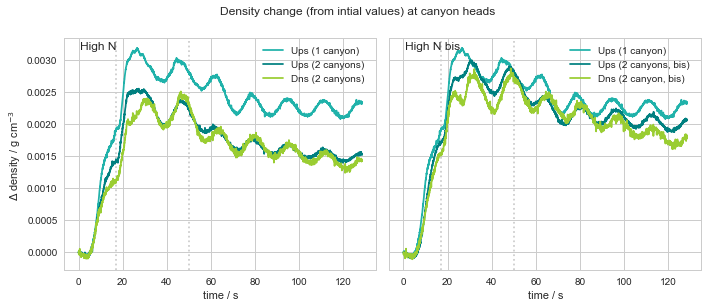

In [13]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4), sharey=True)
labels = ['1-upstream','2-downstream']

filepath_two = '../../exp_26mar19/experiment.mat'
filepath_ups = '../../exp_04apr19/experiment.mat'
filepath_dns = '../../exp_06apr19/experiment.mat'

plot_uprofile(ax0)
plot_uprofile(ax1)

mat_two = sio.loadmat(filepath_two, squeeze_me=True)
P1_two = mat_two['ch1']
P2_two = mat_two['ch2']
time_two = mat_two['time']

mat_ups = sio.loadmat(filepath_ups, squeeze_me=True)
P1_ups = mat_ups['ch1']
P2_ups = mat_ups['ch2']
time_ups = mat_ups['time']

mat_dns = sio.loadmat(filepath_dns, squeeze_me=True)
P1_dns = mat_dns['ch1']
P2_dns = mat_dns['ch2']
time_dns = mat_dns['time']

ax0.plot(time_ups,dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0], label='Ups (1 canyon)', color='lightseagreen')
ax0.plot(time_two,dens_ANK1(P1_two)-dens_ANK1(P1_two)[0], label='Ups (2 canyons)', color='teal')
ax0.plot(time_two,dens_ANK2(P2_two)-dens_ANK2(P2_two)[0], label='Dns (2 canyons) ', color='yellowgreen')

ax1.plot(time_ups,dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0], label='Ups (1 canyon)', color='lightseagreen')
ax1.plot(time,dens_ANK1(P1)-dens_ANK1(P1)[0],'-', label='Ups (2 canyons, bis) ', color='teal')
ax1.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0],'-', label='Dns (2 canyon, bis)' , color='yellowgreen')

ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel('$\Delta$ density / g cm$^{-3}$ ')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax0.text(0.5,1.1,'Density change (from intial values) at canyon heads',transform=ax0.transAxes)
ax0.text(0.05,0.95,'High N',transform=ax0.transAxes)
ax1.text(0.05,0.95,'High N bis',transform=ax1.transAxes)

plt.tight_layout()

The rerun of 2-canyons, high N experiment shows a larger change in density than the original run (right panel vs left panel). Both canyons behave the same (teal vs green in both panels is the same) but now the density change is not smaller than in the 1 canyon runs, it is almost the same (blue vs teal vs green in right panel are all very close). 

Which one is correct? Could it be that the stratification is somehow different? (too bad I couldn't get profiles today) or is it that the probes are inconsistent? Well... I guess I have to rerun a third time.

### Figures for talks

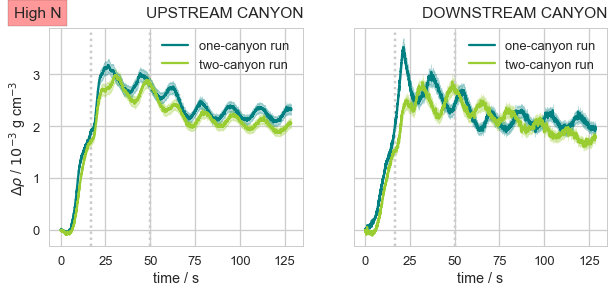

In [14]:
err_ANK1 = 0.04
err_ANK2 = 0.05

sns.set_context('talk')

fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4), sharey=True)
labels = ['1-upstream','2-downstream']

plot_uprofile(ax0)
plot_uprofile(ax1)

#filepath_two = '../../exp_26mar19/experiment.mat'
filepath_ups = '../../exp_04apr19/experiment.mat'
filepath_dns = '../../exp_06apr19/experiment.mat'

plot_uprofile(ax0)
plot_uprofile(ax1)

#mat_two = sio.loadmat(filepath_two, squeeze_me=True)
#P1_two = mat_two['ch1']
#P2_two = mat_two['ch2']
#time_two = mat_two['time']

mat_ups = sio.loadmat(filepath_ups, squeeze_me=True)
P1_ups = mat_ups['ch1']
time_ups = mat_ups['time']

mat_dns = sio.loadmat(filepath_dns, squeeze_me=True)
P2_dns = mat_dns['ch2']
time_dns = mat_dns['time']

err_plus_ups2 = (dens_ANK1(P1)-dens_ANK1(P1)[0])+err_ANK1*(dens_ANK1(P1)-dens_ANK1(P1)[0])
err_minu_ups2 = (dens_ANK1(P1)-dens_ANK1(P1)[0])-err_ANK1*(dens_ANK1(P1)-dens_ANK1(P1)[0])

err_plus_ups1 = (dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])+err_ANK1*(dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])
err_minu_ups1 = (dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])-err_ANK1*(dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])

ax0.plot(time_ups,(dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])*1E3, label='one-canyon run', color='teal')
ax0.plot(time,(dens_ANK1(P1)-dens_ANK1(P1)[0])*1E3,'-', label='two-canyon run ', color='yellowgreen')

ax0.fill_between(time, err_minu_ups2*1E3, err_plus_ups2*1E3, color='yellowgreen', alpha=0.3)
ax0.fill_between(time, err_minu_ups1*1E3, err_plus_ups1*1E3, color='teal', alpha=0.3)

err_plus_dns2 = (dens_ANK2(P2)-dens_ANK2(P2)[0])+err_ANK2*(dens_ANK2(P2)-dens_ANK2(P2)[0])
err_minu_dns2 = (dens_ANK2(P2)-dens_ANK2(P2)[0])-err_ANK2*(dens_ANK2(P2)-dens_ANK2(P2)[0])

err_plus_dns1 = (dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])+err_ANK2*(dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])
err_minu_dns1 = (dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])-err_ANK2*(dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])

ax1.plot(time_dns,(dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])*1E3,'-', label='one-canyon run' , color='teal')
ax1.plot(time,(dens_ANK2(P2)-dens_ANK2(P2)[0])*1E3,'-', label='two-canyon run' , color='yellowgreen')

ax1.fill_between(time, err_minu_dns2*1E3, err_plus_dns2*1E3, color='yellowgreen', alpha=0.3)
ax1.fill_between(time, err_minu_dns1*1E3, err_plus_dns1*1E3, color='teal', alpha=0.3)

ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel(r'$\Delta \rho$ / $10^{-3}$ g cm$^{-3}$ ')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax0.text(0.38,1.05,'UPSTREAM CANYON',transform=ax0.transAxes)
ax1.text(0.27,1.05,'DOWNSTREAM CANYON',transform=ax1.transAxes)
ax0.text(-0.14,1.05,'High N',transform=ax0.transAxes, bbox={'facecolor':'red', 'alpha':0.4, 'pad':6})

fig.patch.set_facecolor('white')
fig.savefig('figures/high_N_ups_dns.pdf', format='pdf',dpi=150, facecolor=fig.get_facecolor())

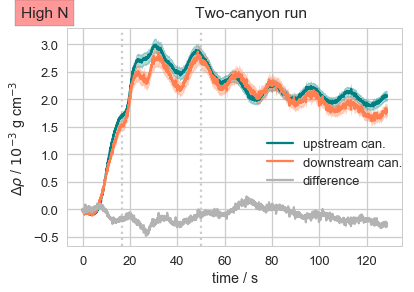

In [15]:
err_ANK1 = 0.04
err_ANK2 = 0.05

sns.set_context('talk')

fig, (ax0) = plt.subplots(1,1, figsize=(6,4), sharey=True)

plot_uprofile(ax0)

err_plus_ups2 = (dens_ANK1(P1)-dens_ANK1(P1)[0])+err_ANK1*(dens_ANK1(P1)-dens_ANK1(P1)[0])
err_minu_ups2 = (dens_ANK1(P1)-dens_ANK1(P1)[0])-err_ANK1*(dens_ANK1(P1)-dens_ANK1(P1)[0])
err_plus_dns2 = (dens_ANK2(P2)-dens_ANK2(P2)[0])+err_ANK2*(dens_ANK2(P2)-dens_ANK2(P2)[0])
err_minu_dns2 = (dens_ANK2(P2)-dens_ANK2(P2)[0])-err_ANK2*(dens_ANK2(P2)-dens_ANK2(P2)[0])

ax0.plot(time,(dens_ANK1(P1)-dens_ANK1(P1)[0])*1E3,'-', label='upstream can.', color='teal')

ax0.fill_between(time, err_minu_ups2*1E3, err_plus_ups2*1E3, color='teal', alpha=0.3)

ax0.plot(time,(dens_ANK2(P2)-dens_ANK2(P2)[0])*1E3,'-', label='downstream can.' , color='coral')

ax0.fill_between(time, err_minu_dns2*1E3, err_plus_dns2*1E3, color='coral', alpha=0.3)

ax0.plot(time,(dens_ANK2(P2)-dens_ANK2(P2)[0])*1E3-(dens_ANK1(P1)-dens_ANK1(P1)[0])*1E3,
         '-', label='difference' , color='0.7')

ax0.set_ylabel(r'$\Delta \rho$ / $10^{-3}$ g cm$^{-3}$ ')
ax0.set_xlabel('time / s')
ax0.text(-0.14,1.05,'High N',transform=ax0.transAxes, bbox={'facecolor':'red', 'alpha':0.4, 'pad':6})
ax0.text(0.38,1.05,'Two-canyon run',transform=ax0.transAxes)
ax0.legend(bbox_to_anchor=(0.56,0.55))
fig.patch.set_facecolor('white')
fig.savefig('figures/high_N_ups_vs_dns.pdf', format='pdf',dpi=150, facecolor=fig.get_facecolor())

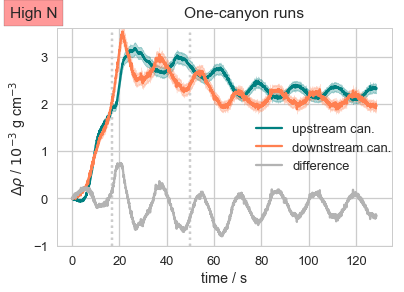

In [16]:
err_ANK1 = 0.04
err_ANK2 = 0.05

sns.set_context('talk')

fig, (ax0) = plt.subplots(1,1, figsize=(6,4), sharey=True)

plot_uprofile(ax0)
plot_uprofile(ax1)

filepath_ups = '../../exp_04apr19/experiment.mat'
filepath_dns = '../../exp_06apr19/experiment.mat'

plot_uprofile(ax0)
mat_ups = sio.loadmat(filepath_ups, squeeze_me=True)
P1_ups = mat_ups['ch1']
time_ups = mat_ups['time']

mat_dns = sio.loadmat(filepath_dns, squeeze_me=True)
P2_dns = mat_dns['ch2']
time_dns = mat_dns['time']

err_plus_ups1 = (dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])+err_ANK1*(dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])
err_minu_ups1 = (dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])-err_ANK1*(dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])

ax0.plot(time_ups,(dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])*1E3, label='upstream can.', color='teal')
ax0.fill_between(time, err_minu_ups1*1E3, err_plus_ups1*1E3, color='teal', alpha=0.3)

err_plus_dns1 = (dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])+err_ANK2*(dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])
err_minu_dns1 = (dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])-err_ANK2*(dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])

ax0.plot(time_dns,(dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])*1E3,'-', label='downstream can.' , color='coral')
ax0.fill_between(time, err_minu_dns1*1E3, err_plus_dns1*1E3, color='coral', alpha=0.3)

ax0.plot(time_dns,((dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])-(dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0]))*1E3,
         '-', label='difference' , color='0.7')

ax0.legend(bbox_to_anchor = (0.56,0.45))
ax0.set_ylabel(r'$\Delta \rho$ / $10^{-3}$ g cm$^{-3}$ ')
ax0.set_xlabel('time / s')
ax0.text(0.38,1.05,'One-canyon runs',transform=ax0.transAxes)
ax0.text(-0.14,1.05,'High N',transform=ax0.transAxes, bbox={'facecolor':'red', 'alpha':0.4, 'pad':6})
ax0.set_ylim(-1,3.6)
fig.patch.set_facecolor('white')
fig.savefig('figures/high_N_1can_difference.pdf', format='pdf',dpi=150, facecolor=fig.get_facecolor())

#### Low N runs

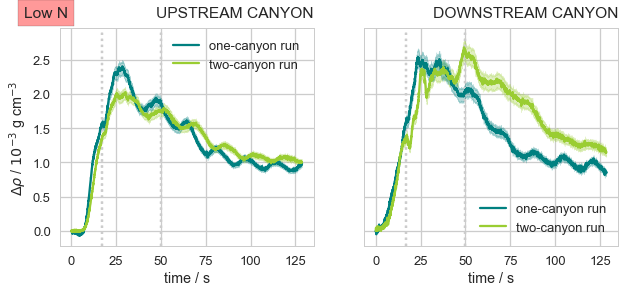

In [17]:
err_ANK1 = 0.04
err_ANK2 = 0.05

sns.set_context('talk')

fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4), sharey=True)
labels = ['1-upstream','2-downstream']

plot_uprofile(ax0)
plot_uprofile(ax1)

filepath_two = '../../exp_28mar19/experiment_2.mat'
filepath_ups = '../../exp_02apr19/experiment.mat'
filepath_dns = '../../exp_30mar19/experiment_3.mat'

plot_uprofile(ax0)
plot_uprofile(ax1)

mat_two = sio.loadmat(filepath_two, squeeze_me=True)
P1_two = mat_two['ch1']
P2_two = mat_two['ch2']
time_two = mat_two['time']

mat_ups = sio.loadmat(filepath_ups, squeeze_me=True)
P1_ups = mat_ups['ch1']
time_ups = mat_ups['time']

mat_dns = sio.loadmat(filepath_dns, squeeze_me=True)
P2_dns = mat_dns['ch2']
time_dns = mat_dns['time']

err_plus_ups2 = (dens_ANK1(P1_two)-dens_ANK1(P1_two)[0])+err_ANK1*(dens_ANK1(P1_two)-dens_ANK1(P1_two)[0])
err_minu_ups2 = (dens_ANK1(P1_two)-dens_ANK1(P1_two)[0])-err_ANK1*(dens_ANK1(P1_two)-dens_ANK1(P1_two)[0])

err_plus_ups1 = (dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])+err_ANK1*(dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])
err_minu_ups1 = (dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])-err_ANK1*(dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])

ax0.plot(time_ups,(dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])*1E3, label='one-canyon run', color='teal')
ax0.plot(time,(dens_ANK1(P1_two)-dens_ANK1(P1_two)[0])*1E3,'-', label='two-canyon run ', color='yellowgreen')

ax0.fill_between(time, err_minu_ups2*1E3, err_plus_ups2*1E3, color='yellowgreen', alpha=0.3)
ax0.fill_between(time, err_minu_ups1*1E3, err_plus_ups1*1E3, color='teal', alpha=0.3)

err_plus_dns2 = (dens_ANK2(P2_two)-dens_ANK2(P2_two)[0])+err_ANK2*(dens_ANK2(P2_two)-dens_ANK2(P2_two)[0])
err_minu_dns2 = (dens_ANK2(P2_two)-dens_ANK2(P2_two)[0])-err_ANK2*(dens_ANK2(P2_two)-dens_ANK2(P2_two)[0])

err_plus_dns1 = (dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])+err_ANK2*(dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])
err_minu_dns1 = (dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])-err_ANK2*(dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])

ax1.plot(time_dns,(dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])*1E3,'-', label='one-canyon run' , color='teal')
ax1.plot(time,(dens_ANK2(P2_two)-dens_ANK2(P2_two)[0])*1E3,'-', label='two-canyon run' , color='yellowgreen')

ax1.fill_between(time, err_minu_dns2*1E3, err_plus_dns2*1E3, color='yellowgreen', alpha=0.3)
ax1.fill_between(time, err_minu_dns1*1E3, err_plus_dns1*1E3, color='teal', alpha=0.3)

ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel(r'$\Delta \rho$ / $10^{-3}$ g cm$^{-3}$ ')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax0.text(0.38,1.05,'UPSTREAM CANYON',transform=ax0.transAxes)
ax1.text(0.27,1.05,'DOWNSTREAM CANYON',transform=ax1.transAxes)
ax0.text(-0.14,1.05,'Low N',transform=ax0.transAxes, bbox={'facecolor':'red', 'alpha':0.4, 'pad':6})

fig.patch.set_facecolor('white')
fig.savefig('figures/low_N_ups_dns.pdf', format='pdf',dpi=150, facecolor=fig.get_facecolor())

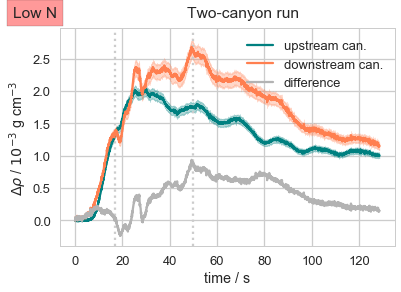

In [18]:
err_ANK1 = 0.04
err_ANK2 = 0.05

filepath_two = '../../exp_28mar19/experiment_2.mat'
mat_two = sio.loadmat(filepath_two, squeeze_me=True)

P1 = mat_two['ch1']
P2 = mat_two['ch2']
time_two = mat_two['time']

sns.set_context('talk')

fig, (ax0) = plt.subplots(1,1, figsize=(6,4), sharey=True)

plot_uprofile(ax0)

err_plus_ups2 = (dens_ANK1(P1)-dens_ANK1(P1)[0])+err_ANK1*(dens_ANK1(P1)-dens_ANK1(P1)[0])
err_minu_ups2 = (dens_ANK1(P1)-dens_ANK1(P1)[0])-err_ANK1*(dens_ANK1(P1)-dens_ANK1(P1)[0])
err_plus_dns2 = (dens_ANK2(P2)-dens_ANK2(P2)[0])+err_ANK2*(dens_ANK2(P2)-dens_ANK2(P2)[0])
err_minu_dns2 = (dens_ANK2(P2)-dens_ANK2(P2)[0])-err_ANK2*(dens_ANK2(P2)-dens_ANK2(P2)[0])

ax0.plot(time,(dens_ANK1(P1)-dens_ANK1(P1)[0])*1E3,'-', label='upstream can.', color='teal')

ax0.fill_between(time, err_minu_ups2*1E3, err_plus_ups2*1E3, color='teal', alpha=0.3)

ax0.plot(time,(dens_ANK2(P2)-dens_ANK2(P2)[0])*1E3,'-', label='downstream can.' , color='coral')

ax0.fill_between(time, err_minu_dns2*1E3, err_plus_dns2*1E3, color='coral', alpha=0.3)

ax0.plot(time,(dens_ANK2(P2)-dens_ANK2(P2)[0])*1E3-(dens_ANK1(P1)-dens_ANK1(P1)[0])*1E3,
         '-', label='difference' , color='0.7')

ax0.legend(loc=0)
ax0.set_ylabel(r'$\Delta \rho$ / $10^{-3}$ g cm$^{-3}$ ')
ax0.set_xlabel('time / s')
ax0.text(-0.14,1.05,'Low N',transform=ax0.transAxes, bbox={'facecolor':'red', 'alpha':0.4, 'pad':6})
ax0.text(0.38,1.05,'Two-canyon run',transform=ax0.transAxes)

fig.patch.set_facecolor('white')
fig.savefig('figures/low_N_ups_vs_dns.pdf', format='pdf',dpi=150, facecolor=fig.get_facecolor())

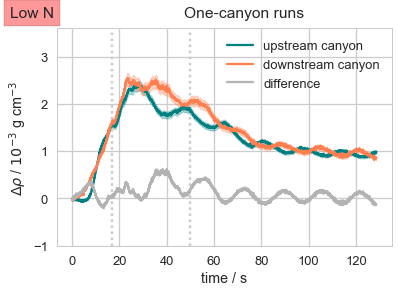

In [19]:
err_ANK1 = 0.04
err_ANK2 = 0.05

sns.set_context('talk')

fig, (ax0) = plt.subplots(1,1, figsize=(6,4), sharey=True)

plot_uprofile(ax0)
plot_uprofile(ax1)

filepath_ups = '../../exp_02apr19/experiment.mat'
filepath_dns = '../../exp_30mar19/experiment_3.mat'

plot_uprofile(ax0)
mat_ups = sio.loadmat(filepath_ups, squeeze_me=True)
P1_ups = mat_ups['ch1']
time_ups = mat_ups['time']

mat_dns = sio.loadmat(filepath_dns, squeeze_me=True)
P2_dns = mat_dns['ch2']
time_dns = mat_dns['time']

err_plus_ups1 = (dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])+err_ANK1*(dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])
err_minu_ups1 = (dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])-err_ANK1*(dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])

ax0.plot(time_ups,(dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0])*1E3, label='upstream canyon', color='teal')
ax0.fill_between(time, err_minu_ups1*1E3, err_plus_ups1*1E3, color='teal', alpha=0.3)

err_plus_dns1 = (dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])+err_ANK2*(dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])
err_minu_dns1 = (dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])-err_ANK2*(dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])

ax0.plot(time_dns,(dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])*1E3,'-', label='downstream canyon' , color='coral')
ax0.fill_between(time, err_minu_dns1*1E3, err_plus_dns1*1E3, color='coral', alpha=0.3)

ax0.plot(time_dns,((dens_ANK2(P2_dns)-dens_ANK2(P2_dns)[0])-(dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0]))*1E3,
         '-', label='difference' , color='0.7')

ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel(r'$\Delta \rho$ / $10^{-3}$ g cm$^{-3}$ ')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax0.text(0.38,1.05,'One-canyon runs',transform=ax0.transAxes)
ax0.text(-0.14,1.05,'Low N',transform=ax0.transAxes, bbox={'facecolor':'red', 'alpha':0.4, 'pad':6})
ax0.set_ylim(-1,3.6)
fig.patch.set_facecolor('white')
fig.savefig('figures/low_N_1can_difference.pdf', format='pdf',dpi=150, facecolor=fig.get_facecolor())

#### High vs. low N

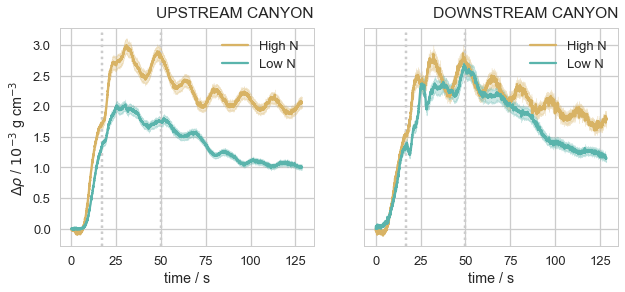

In [20]:
err_ANK1 = 0.04
err_ANK2 = 0.05

colors = ['#d8b365','#5ab4ac']

sns.set_context('talk')

fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4), sharey=True)

plot_uprofile(ax0)
plot_uprofile(ax1)

filepath_H = '../../exp_09apr19/experiment.mat'
filepath_L = '../../exp_28mar19/experiment_2.mat'

plot_uprofile(ax0)
plot_uprofile(ax1)

mat_H = sio.loadmat(filepath_H, squeeze_me=True)
P1_H = mat_H['ch1']
P2_H = mat_H['ch2']
time_H = mat_H['time']

mat_L = sio.loadmat(filepath_L, squeeze_me=True)
P1_L = mat_L['ch1']
P2_L = mat_L['ch2']
time_L = mat_L['time']


err_plus_H = (dens_ANK1(P1_H)-dens_ANK1(P1_H)[0])+err_ANK1*(dens_ANK1(P1_H)-dens_ANK1(P1_H)[0])
err_minu_H = (dens_ANK1(P1_H)-dens_ANK1(P1_H)[0])-err_ANK1*(dens_ANK1(P1_H)-dens_ANK1(P1_H)[0])

err_plus_L = (dens_ANK1(P1_L)-dens_ANK1(P1_L)[0])+err_ANK1*(dens_ANK1(P1_L)-dens_ANK1(P1_L)[0])
err_minu_L = (dens_ANK1(P1_L)-dens_ANK1(P1_L)[0])-err_ANK1*(dens_ANK1(P1_L)-dens_ANK1(P1_L)[0])

ax0.plot(time,(dens_ANK1(P1_H)-dens_ANK1(P1_H)[0])*1E3,'-', label='High N ', color=colors[0])
ax0.plot(time_ups,(dens_ANK1(P1_L)-dens_ANK1(P1_L)[0])*1E3, label='Low N', color=colors[1])

ax0.fill_between(time, err_minu_H*1E3, err_plus_H*1E3, color=colors[0], alpha=0.3)
ax0.fill_between(time, err_minu_L*1E3, err_plus_L*1E3, color=colors[1], alpha=0.3)

err_plus_H2 = (dens_ANK2(P2_H)-dens_ANK2(P2_H)[0])+err_ANK2*(dens_ANK2(P2_H)-dens_ANK2(P2_H)[0])
err_minu_H2 = (dens_ANK2(P2_H)-dens_ANK2(P2_H)[0])-err_ANK2*(dens_ANK2(P2_H)-dens_ANK2(P2_H)[0])

err_plus_L2 = (dens_ANK2(P2_L)-dens_ANK2(P2_L)[0])+err_ANK2*(dens_ANK2(P2_L)-dens_ANK2(P2_L)[0])
err_minu_L2 = (dens_ANK2(P2_L)-dens_ANK2(P2_L)[0])-err_ANK2*(dens_ANK2(P2_L)-dens_ANK2(P2_L)[0])

ax1.plot(time,(dens_ANK2(P2_H)-dens_ANK2(P2_H)[0])*1E3,'-', label='High N' , color=colors[0])
ax1.plot(time_dns,(dens_ANK2(P2_L)-dens_ANK2(P2_L)[0])*1E3,'-', label='Low N' , color=colors[1])

ax1.fill_between(time, err_minu_H2*1E3, err_plus_H2*1E3, color=colors[0], alpha=0.3)
ax1.fill_between(time, err_minu_L2*1E3, err_plus_L2*1E3, color=colors[1], alpha=0.3)

ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel(r'$\Delta \rho$ / $10^{-3}$ g cm$^{-3}$ ')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax0.text(0.38,1.05,'UPSTREAM CANYON',transform=ax0.transAxes)
ax1.text(0.27,1.05,'DOWNSTREAM CANYON',transform=ax1.transAxes)

fig.patch.set_facecolor('white')
fig.savefig('figures/two-can_high_vs_low.pdf', format='pdf',dpi=150, facecolor=fig.get_facecolor())